In [17]:
import numpy as np
import matplotlib.pyplot as plt

#PATHS
VIT_PATH = '/home/maria/ProjectionSort/data/google_vit-base-patch16-224_embeddings_logits.pkl'
NEURAL_PATH = '/home/maria/ProjectionSort/data/hybrid_neural_responses_reduced.npy'
AREAS_PATH = '/home/maria/ProjectionSort/data/brain_area.npy'  

neural_activations=np.load(NEURAL_PATH)
print(neural_activations.shape)
vit_logits=np.load(VIT_PATH, allow_pickle=True)
areas_list=np.load(AREAS_PATH, allow_pickle=True)

(39209, 118)


In [18]:
import numpy as np

# load your data
neural_activations = np.load(NEURAL_PATH)
vit_logits = np.load(VIT_PATH, allow_pickle=True)
areas_list = np.load(AREAS_PATH, allow_pickle=True)

# tiny step: print basic shapes
print("Neural activations shape:", neural_activations.shape)
print("ViT logits keys:", list(vit_logits.keys()))
print("Brain areas shape:", areas_list.shape)

Neural activations shape: (39209, 118)
ViT logits keys: ['natural_movie_one', 'natural_movie_two', 'natural_movie_three', 'natural_scenes']
Brain areas shape: (39209,)


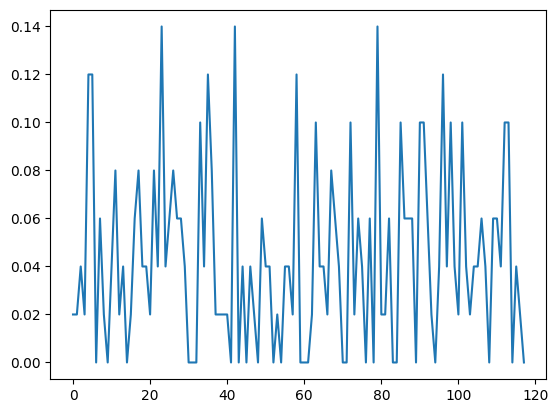

In [19]:
plt.plot(neural_activations[0])

In [20]:
# TINY STEP 2: select one stimulus set and one tiny slice
X_vit = vit_logits['natural_scenes']    # shape (???, D)
X_vit = np.asarray(X_vit)

print("Natural scenes shape:", X_vit.shape)

# take the first 64 images
X_small = X_vit#X_vit[:64]

print("X_small shape:", X_small.shape)


Natural scenes shape: (118, 1000)
X_small shape: (118, 1000)


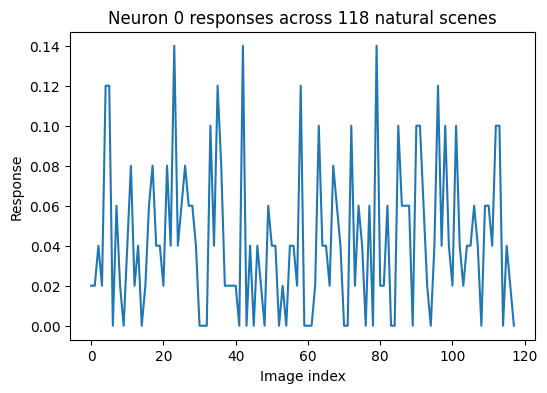

In [21]:
# TINY STEP 3: pick one neuron and plot its responses

neuron_index = 0   # we can change this later

neuron_responses = neural_activations[neuron_index]  # shape (118,)

plt.figure(figsize=(6,4))
plt.plot(neuron_responses)
plt.title(f"Neuron {neuron_index} responses across 118 natural scenes")
plt.xlabel("Image index")
plt.ylabel("Response")
plt.show()


In [22]:
# TINY STEP 4: slice the neural data to the same 64 images
Y_small =neural_activations# neural_activations[:, :64]   # shape (39209, 64)

print("Y_small shape:", Y_small.shape)
print("X_small shape:", X_small.shape)


Y_small shape: (39209, 118)
X_small shape: (118, 1000)


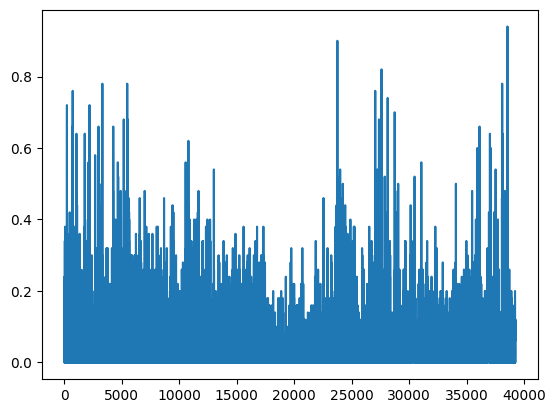

In [23]:
plt.plot(neural_activations[:,0])

In [24]:
from sklearn.decomposition import PCA
import numpy as np

# PCA on ViT data
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_small)      # shape (64, 5)

# First principal direction (in original ViT embedding space)
v1 = pca.components_[0]                 # shape (1000,)

# PC1 scores for each of the 64 images
scores_vit = X_small @ v1               # shape (64,)

print("scores_vit shape:", scores_vit.shape)
print(scores_vit[:10])


scores_vit shape: (118,)
[30.939774   22.346973   27.295803   10.183243    0.08484381 30.611366
 24.001753   29.11713    11.865739   18.130222  ]


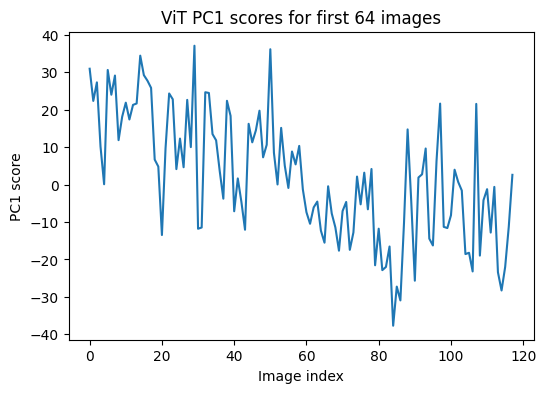

In [25]:
plt.figure(figsize=(6,4))
plt.plot(scores_vit)
plt.title("ViT PC1 scores for first 64 images")
plt.xlabel("Image index")
plt.ylabel("PC1 score")
plt.show()


In [26]:
# TINY STEP 7: ordering of images according to ViT PC1
order_vit = np.argsort(scores_vit)

print("Order (first 10 indices):", order_vit[:10])
print("Smallest scores (first 10):", scores_vit[order_vit[:10]])


Order (first 10 indices): [ 84  86 114  85  90 113 106  81 115  82]
Smallest scores (first 10): [-37.698254 -30.937244 -28.290096 -27.24451  -25.672642 -23.418608
 -23.198935 -22.854454 -22.003874 -22.001123]


In [27]:
# TINY STEP 8: select only the first 50 neurons
Y_tiny = Y_small[:50]     # shape (50, 64)

print("Y_tiny shape:", Y_tiny.shape)

Y_tiny shape: (50, 118)


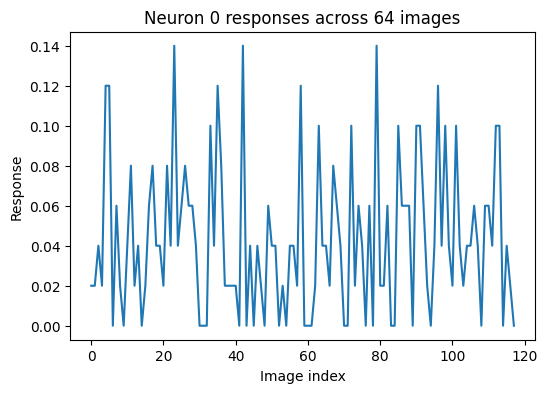

First 10 neuron scores: [0.02 0.02 0.04 0.02 0.12 0.12 0.   0.06 0.02 0.  ]


In [28]:
# TINY STEP 9: pick one neuron from Y_tiny
neuron_idx = 0
neuron_scores = Y_tiny[neuron_idx]    # shape (64,)

plt.figure(figsize=(6,4))
plt.plot(neuron_scores)
plt.title(f"Neuron {neuron_idx} responses across 64 images")
plt.xlabel("Image index")
plt.ylabel("Response")
plt.show()

print("First 10 neuron scores:", neuron_scores[:10])


In [29]:
from scipy.stats import spearmanr

rho, p = spearmanr(scores_vit, neuron_scores)

print("Spearman correlation:", rho)
print("p-value:", p)

Spearman correlation: 0.0449407226938224
p-value: 0.6289333715554064


In [30]:
# TINY STEP 13: get top/bottom 10 indices

# ViT ordering
order_vit = np.argsort(scores_vit)
vit_bottom10 = order_vit[:10]
vit_top10 = order_vit[-10:]

print("ViT bottom 10:", vit_bottom10)
print("ViT top 10:", vit_top10)

# Neuron ordering
order_neuron = np.argsort(neuron_scores)
neuron_bottom10 = order_neuron[:10]
neuron_top10 = order_neuron[-10:]

print("Neuron bottom 10:", neuron_bottom10)
print("Neuron top 10:", neuron_top10)


ViT bottom 10: [ 84  86 114  85  90 113 106  81 115  82]
ViT top 10: [17  2 16  7 15  5  0 14 50 29]
Neuron bottom 10: [ 6  9 14 31 30 43 60 61 48 52]
Neuron top 10: [85 91  5  4 96 58 35 23 42 79]


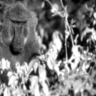

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

IMG_DIR = "/home/maria/ProjectionSort/data/images/images"

def load_image(idx):
    fname = f"scene_{idx:03d}.png"
    path = os.path.join(IMG_DIR, fname)
    return Image.open(path)

load_image(23)

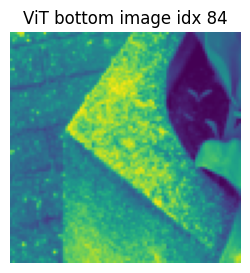

In [32]:
plt.figure(figsize=(3,3))
plt.imshow(load_image(int(vit_bottom10[0])))
plt.title(f"ViT bottom image idx {vit_bottom10[0]}")
plt.axis("off")
plt.show()


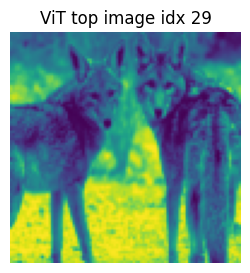

In [33]:
plt.figure(figsize=(3,3))
plt.imshow(load_image(int(vit_top10[-1])))
plt.title(f"ViT top image idx {vit_top10[-1]}")
plt.axis("off")
plt.show()


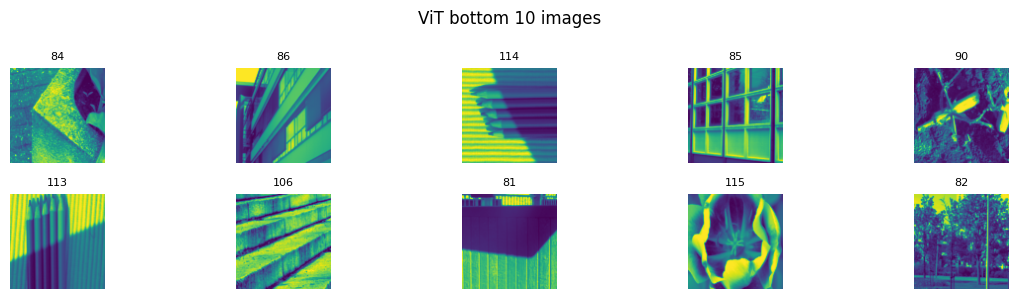

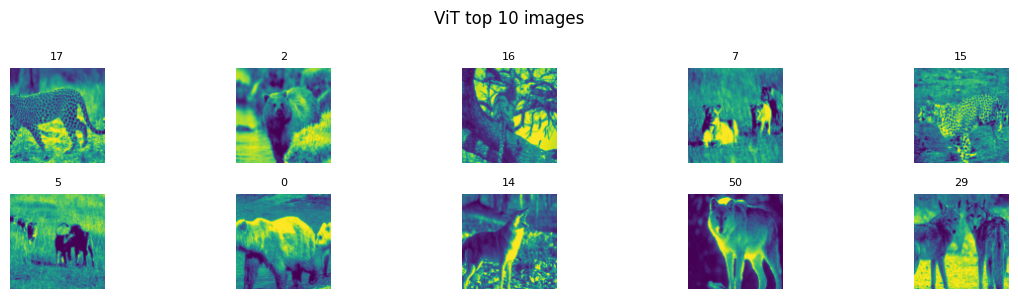

In [34]:
import matplotlib.pyplot as plt

# TINY STEP 16: visualize bottom 10 and top 10 ViT images

def show_image_grid(indices, title):
    plt.figure(figsize=(12, 3))
    for i, idx in enumerate(indices):
        plt.subplot(2, 5, i+1)
        plt.imshow(load_image(int(idx)))
        plt.title(f"{idx}", fontsize=8)
        plt.axis("off")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# bottom 10
show_image_grid(vit_bottom10, "ViT bottom 10 images")

# top 10
show_image_grid(vit_top10, "ViT top 10 images")


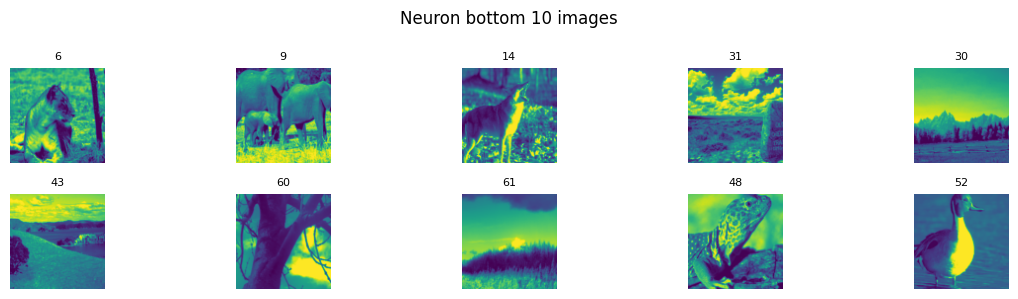

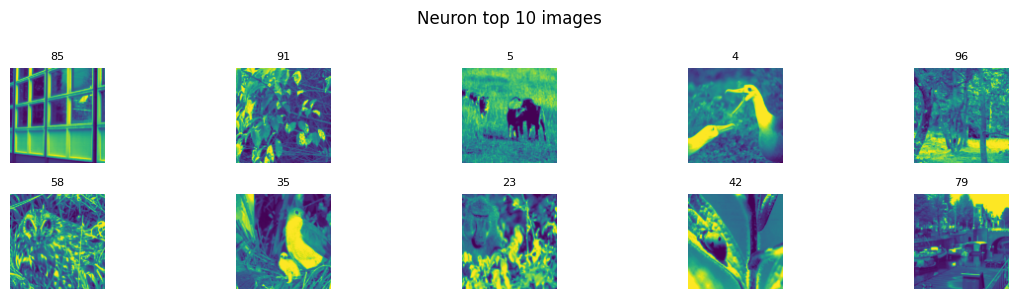

In [35]:
show_image_grid(neuron_bottom10, "Neuron bottom 10 images")
show_image_grid(neuron_top10, "Neuron top 10 images")


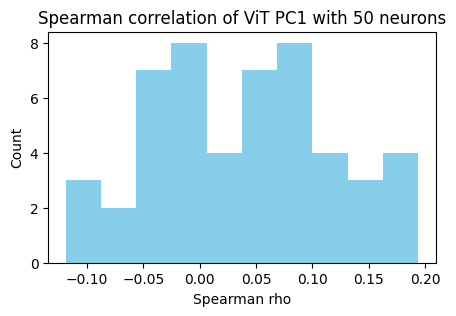

Max rho: 0.19380077144780555
Index of max neuron: 46


In [36]:
from scipy.stats import spearmanr

correlations = []
for j in range(50):
    rho, _ = spearmanr(scores_vit, Y_tiny[j])
    correlations.append(rho)

plt.figure(figsize=(5,3))
plt.hist(correlations, bins=10, color='skyblue')
plt.title("Spearman correlation of ViT PC1 with 50 neurons")
plt.xlabel("Spearman rho")
plt.ylabel("Count")
plt.show()

print("Max rho:", np.max(correlations))
print("Index of max neuron:", np.argmax(correlations))


Best neuron index: 20
Best neuron rho: 0.1776943776103961


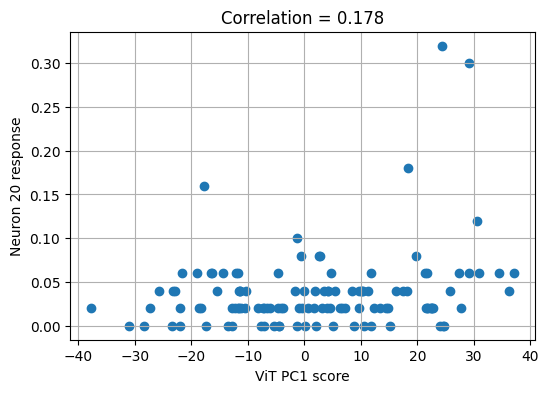

In [45]:
max_rho = np.max(correlations)
best_neuron = np.argmax(correlations)
best_neuron=20
max_rho=correlations[best_neuron]

print("Best neuron index:", best_neuron)
print("Best neuron rho:", max_rho)

best_scores = Y_tiny[best_neuron]

plt.figure(figsize=(6,4))
plt.scatter(scores_vit, best_scores)
plt.xlabel("ViT PC1 score")
plt.ylabel(f"Neuron {best_neuron} response")
plt.title(f"Correlation = {max_rho:.3f}")
plt.grid(True)
plt.show()


In [46]:
print(len(best_scores))

118


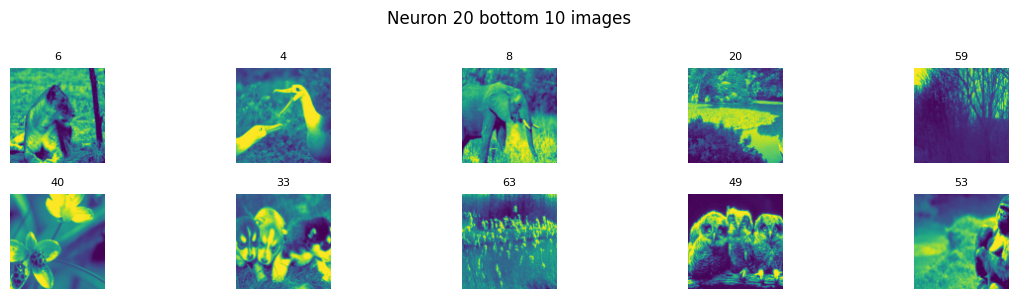

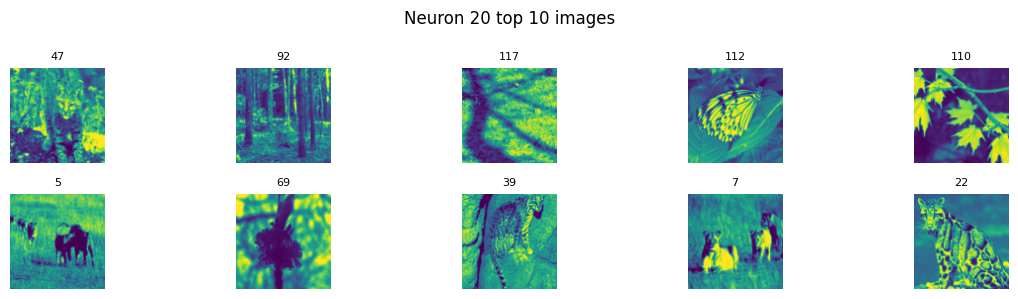

In [38]:
# bottom 10 images for neuron 20
bottom10_20 = np.argsort(Y_tiny[20])[:10]
top10_20 = np.argsort(Y_tiny[20])[-10:]

show_image_grid(bottom10_20, "Neuron 20 bottom 10 images")
show_image_grid(top10_20, "Neuron 20 top 10 images")


In [47]:
# TINY STEP 21: find the top 2 images that drive the correlation
top2_idx = np.argsort(best_scores)[-2:]

print("Top 2 images driving correlation:", top2_idx)
print("Their neural scores:", best_scores[top2_idx])
print("Their ViT PC1 scores:", scores_vit[top2_idx])


Top 2 images driving correlation: [ 7 22]
Their neural scores: [0.3  0.32]
Their ViT PC1 scores: [29.11713 24.33182]


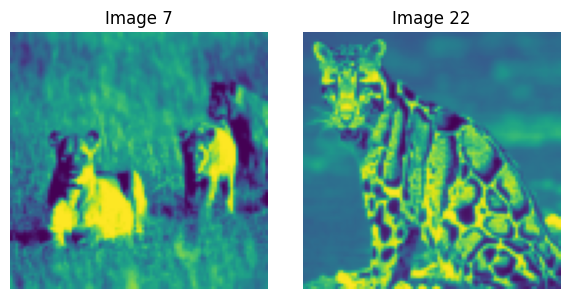

In [48]:
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.imshow(load_image(7))
plt.title("Image 7")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(load_image(22))
plt.title("Image 22")
plt.axis("off")

plt.tight_layout()
plt.show()


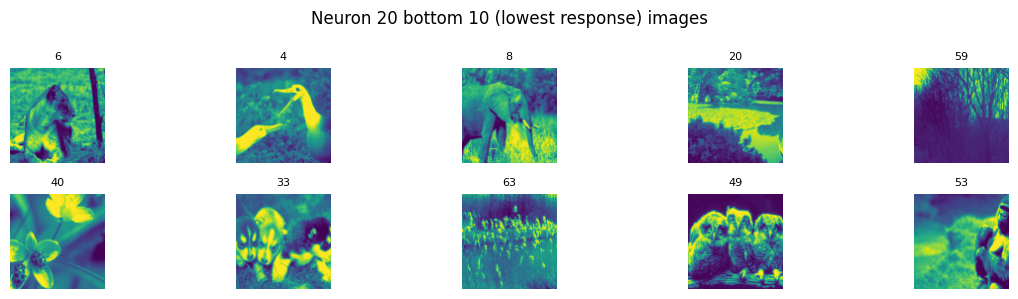

In [41]:
show_image_grid(bottom10_20, "Neuron 20 bottom 10 (lowest response) images")


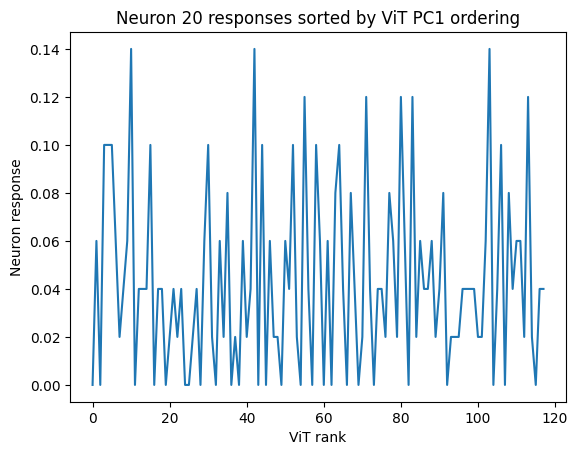

In [42]:
plt.plot(neuron_scores[order_vit])
plt.title("Neuron 20 responses sorted by ViT PC1 ordering")
plt.xlabel("ViT rank")
plt.ylabel("Neuron response")
plt.show()


In [43]:
mask = np.ones_like(scores_vit, dtype=bool)
mask[6] = False   # drop image 6

from scipy.stats import spearmanr
rho_no6, _ = spearmanr(scores_vit[mask], Y_tiny[20][mask])
print("Spearman without image 6:", rho_no6)


Spearman without image 6: 0.19608668422765282
